In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

In [2]:
%config InlineBackend.rc={'figure.figsize': (12, 8)}

In [3]:
path = os.getcwd().replace('auxiliaries', 'pupil_deep/eye_test/label')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 20, saw 2


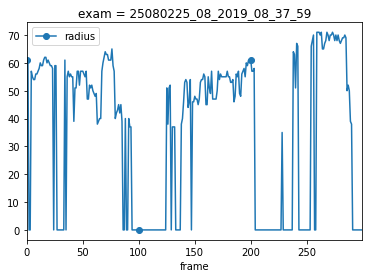

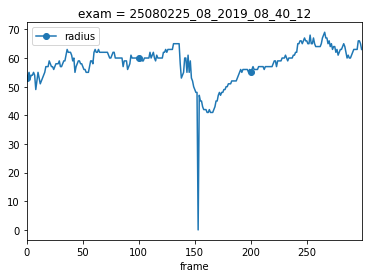

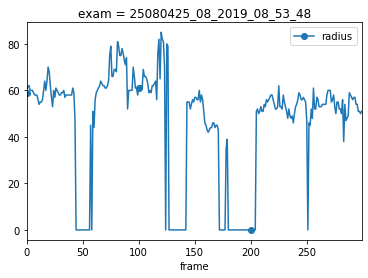

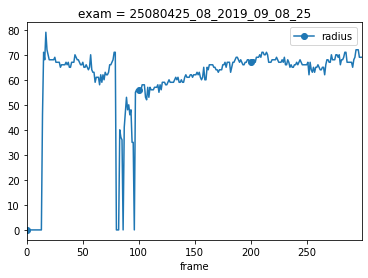

In [4]:
for file in os.listdir(path):
    path_data = os.path.join(path, file)
    dataset = pd.read_csv(path_data)
    exam = file.replace('_label.csv', '')
    title = 'exam = {}'.format(exam)
    
    # ax = dataset.plot.line(x='frame', y=['radius', 'eye_size'],
    #                        linestyle='-', markevery=100, marker='o', title=title)
    
    ax = dataset.plot.line(x='frame', y='radius',
                           linestyle='-', markevery=100, marker='o', title=title)
    
    ax.figure.savefig('{}/graphics_{}.pdf'.format(path, exam))